This notebook is a quick look at the LCS features in OpenDrift. CIOPSE pseudo-analysis interpolate/rotated to a lat/lon grid is used.

In [1]:
import datetime
import os

import numpy as np

from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.oceandrift import OceanDrift

%matplotlib inline

In [2]:
data_dir='/home/soontiensn/data/gpsc-work2/models/ciops-e_operational_forecasts/pseudo-analysis_interp/'

In [3]:
reader = reader_netCDF_CF_generic.Reader(os.path.join(data_dir, 'output/*.nc'))
reader

Reader: /home/soontiensn/data/gpsc-work2/models/ciops-e_operational_forecasts/pseudo-analysis_interp/output/*.nc
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -71.000000   xmax: -56.030000   step: 0.03   numx: 500
  ymin: 45.000000   ymax: 50.970000   step: 0.03   numy: 200
  Corners (lon, lat):
    (-71.00,  50.97)  (-56.03,  50.97)
    (-71.00,  45.00)  (-56.03,  45.00)
Vertical levels [m]: 
  Not specified
Available time range:
  start: 2020-09-08 01:00:00   end: 2020-09-16 00:00:00   step: 1:00:00
    192 times (0 missing)
Variables:
  time
  x_sea_water_velocity
  y_sea_water_velocity

# GSL - land mask from OpenDrift

In [4]:
o1 = OceanDrift(loglevel=20)
o1.add_reader([reader])
o1.set_config('seed:ocean_only', False)
o1.set_config('general:coastline_action', 'stranding')
lcs1 = o1.calculate_ftle(time=datetime.datetime(2020,9,11),
                         time_step=datetime.timedelta(minutes=30),
                         duration=datetime.timedelta(hours=12),
                         delta=0.03,
                         RLCS=False)

11:27:49 INFO    opendrift: OpenDriftSimulation initialised (version 1.4.2)
11:27:49 INFO    opendrift: No reader provided, using first available:
11:27:49 INFO    opendrift: /home/soontiensn/data/gpsc-work2/models/ciops-e_operational_forecasts/pseudo-analysis_interp/output/*.nc
11:27:49 INFO    opendrift: Calculating LCS for 2020-09-11 00:00:00
11:27:49 INFO    opendrift: Nothing to reset
11:27:49 INFO    opendrift: Fallback values will be used for the following variables which have no readers: 
11:27:49 INFO    opendrift: 	x_wind: 0.000000
11:27:49 INFO    opendrift: 	y_wind: 0.000000
11:27:49 INFO    opendrift: 	upward_sea_water_velocity: 0.000000
11:27:49 INFO    opendrift: 	ocean_vertical_diffusivity: 0.000000
11:27:49 INFO    opendrift: 	sea_surface_wave_significant_height: 0.000000
11:27:49 INFO    opendrift: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
11:27:49 INFO    opendrift: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
11:27:49 INFO    opendrift: 	sea_surface

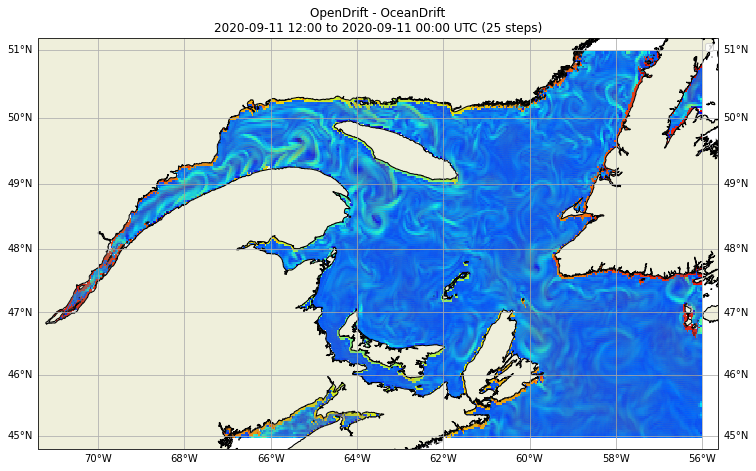

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2020-09-11 12:00 to 2020-09-11 00:00 UTC (25 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [5]:
o1.plot(lcs=lcs1, colorbar=True, show_particles=False)

# GSL - model land mask

In [6]:
f = os.path.join(data_dir, 'land_binary_mask.nc')
reader_land = reader_netCDF_CF_generic.Reader(f)
reader_land

11:35:51 INFO    opendrift.readers.reader_netCDF_CF_generic: Opening dataset: /home/soontiensn/data/gpsc-work2/models/ciops-e_operational_forecasts/pseudo-analysis_interp/land_binary_mask.nc
11:35:51 INFO    opendrift.readers.reader_netCDF_CF_generic: Opening file with Dataset
11:35:52 INFO    opendrift.readers.reader_netCDF_CF_generic: Could not parse CF grid_mapping


Reader: /home/soontiensn/data/gpsc-work2/models/ciops-e_operational_forecasts/pseudo-analysis_interp/land_binary_mask.nc
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -71.000000   xmax: -56.030000   step: 0.03   numx: 500
  ymin: 45.000000   ymax: 50.970000   step: 0.03   numy: 200
  Corners (lon, lat):
    (-71.00,  50.97)  (-56.03,  50.97)
    (-71.00,  45.00)  (-56.03,  45.00)
Vertical levels [m]: 
  Not specified
Available time range:
  start: None   end: None   step: None
Variables:
  land_binary_mask

In [7]:
o2 = OceanDrift(loglevel=20)
o2.add_reader([reader, reader_land])
o2.set_config('seed:ocean_only', False)
o2.set_config('general:use_auto_landmask', False)
o2.set_config('general:coastline_action', 'stranding')
lcs2 = o2.calculate_ftle(time=datetime.datetime(2020,9,11),
                         time_step=datetime.timedelta(minutes=30),
                         duration=datetime.timedelta(hours=12),
                         delta=0.03,
                         RLCS=False)

11:35:52 INFO    opendrift: OpenDriftSimulation initialised (version 1.4.2)
11:35:52 INFO    opendrift: No reader provided, using first available:
11:35:52 INFO    opendrift: /home/soontiensn/data/gpsc-work2/models/ciops-e_operational_forecasts/pseudo-analysis_interp/output/*.nc
11:35:52 INFO    opendrift: Calculating LCS for 2020-09-11 00:00:00
11:35:52 INFO    opendrift: Nothing to reset
11:35:52 INFO    opendrift: Fallback values will be used for the following variables which have no readers: 
11:35:52 INFO    opendrift: 	x_wind: 0.000000
11:35:52 INFO    opendrift: 	y_wind: 0.000000
11:35:52 INFO    opendrift: 	upward_sea_water_velocity: 0.000000
11:35:52 INFO    opendrift: 	ocean_vertical_diffusivity: 0.000000
11:35:52 INFO    opendrift: 	sea_surface_wave_significant_height: 0.000000
11:35:52 INFO    opendrift: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
11:35:52 INFO    opendrift: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
11:35:52 INFO    opendrift: 	sea_surface

I think the Missing variables warnings are from particles leaving the model domain... Will investigate more below

  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')



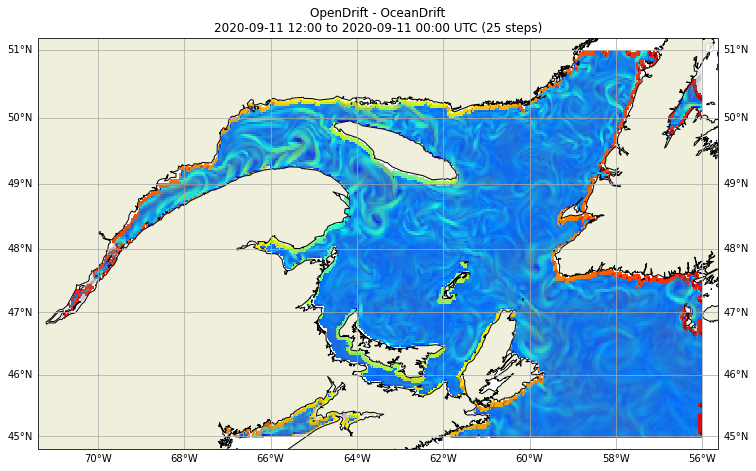

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2020-09-11 12:00 to 2020-09-11 00:00 UTC (25 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [8]:
o2.plot(lcs=lcs2, colorbar=True, show_particles=False)#, vmax=lcs1['ALCS'].max(), vmin= lcs1['ALCS'].min())

# GSL - truncate domain
I think that truncating the domain will remove the "Missing variables: ['land_binary_mask']" warning. 

In [9]:
o3 = OceanDrift(loglevel=20)
o3.add_reader([reader, reader_land])
o3.set_config('seed:ocean_only', False)
o3.set_config('general:use_auto_landmask', False)
o3.set_config('general:coastline_action', 'stranding')
lcs3 = o3.calculate_ftle(time=datetime.datetime(2020,9,11),
                         time_step=datetime.timedelta(minutes=30),
                         duration=datetime.timedelta(hours=12),
                         domain=[-69,-66,48,50],
                         delta=0.03,
                         RLCS=False)

11:44:52 INFO    opendrift: OpenDriftSimulation initialised (version 1.4.2)
11:44:52 INFO    opendrift: No reader provided, using first available:
11:44:52 INFO    opendrift: /home/soontiensn/data/gpsc-work2/models/ciops-e_operational_forecasts/pseudo-analysis_interp/output/*.nc
11:44:52 INFO    opendrift: Calculating LCS for 2020-09-11 00:00:00
11:44:52 INFO    opendrift: Nothing to reset
11:44:52 INFO    opendrift: Fallback values will be used for the following variables which have no readers: 
11:44:52 INFO    opendrift: 	x_wind: 0.000000
11:44:52 INFO    opendrift: 	y_wind: 0.000000
11:44:52 INFO    opendrift: 	upward_sea_water_velocity: 0.000000
11:44:52 INFO    opendrift: 	ocean_vertical_diffusivity: 0.000000
11:44:52 INFO    opendrift: 	sea_surface_wave_significant_height: 0.000000
11:44:52 INFO    opendrift: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
11:44:52 INFO    opendrift: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
11:44:52 INFO    opendrift: 	sea_surface

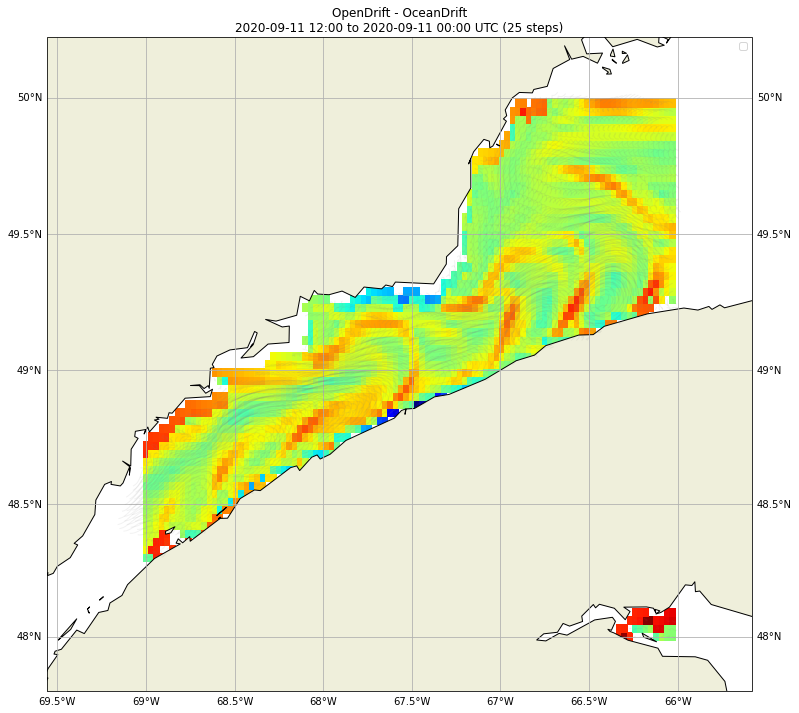

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2020-09-11 12:00 to 2020-09-11 00:00 UTC (25 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [10]:
o3.plot(lcs=lcs3, colorbar=True, show_particles=False)

# GSL - use land_binary_mask fallback value
Another option is to set a fallback value for when the particle leaves the domain.
* 0 = treat out of domain as sea (no motion anyways because u/v have zero fallback values)
* 1 = treat out of domain as land

In [11]:
o4 = OceanDrift(loglevel=20)
o4.add_reader([reader, reader_land])
o4.set_config('seed:ocean_only', False)
o4.set_config('general:use_auto_landmask', False)
o4.set_config('general:coastline_action', 'stranding')
o4.set_config('environment:fallback:land_binary_mask', 1) 
lcs4 = o4.calculate_ftle(time=datetime.datetime(2020,9,11),
                         time_step=datetime.timedelta(minutes=30),
                         duration=datetime.timedelta(hours=12),
                         delta=0.03,
                         RLCS=False)

11:45:26 INFO    opendrift: OpenDriftSimulation initialised (version 1.4.2)
11:45:26 INFO    opendrift: No reader provided, using first available:
11:45:26 INFO    opendrift: /home/soontiensn/data/gpsc-work2/models/ciops-e_operational_forecasts/pseudo-analysis_interp/output/*.nc
11:45:26 INFO    opendrift: Calculating LCS for 2020-09-11 00:00:00
11:45:26 INFO    opendrift: Nothing to reset
11:45:26 INFO    opendrift: Fallback values will be used for the following variables which have no readers: 
11:45:26 INFO    opendrift: 	x_wind: 0.000000
11:45:26 INFO    opendrift: 	y_wind: 0.000000
11:45:26 INFO    opendrift: 	upward_sea_water_velocity: 0.000000
11:45:26 INFO    opendrift: 	ocean_vertical_diffusivity: 0.000000
11:45:26 INFO    opendrift: 	sea_surface_wave_significant_height: 0.000000
11:45:26 INFO    opendrift: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
11:45:26 INFO    opendrift: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
11:45:26 INFO    opendrift: 	sea_surface

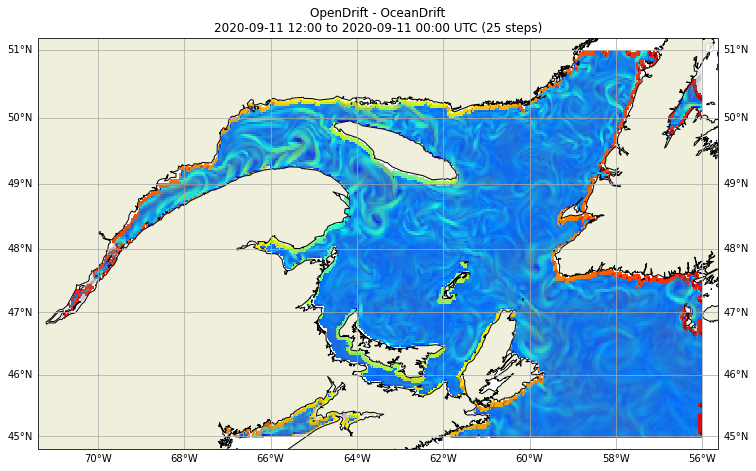

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2020-09-11 12:00 to 2020-09-11 00:00 UTC (25 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [12]:
o4.plot(lcs=lcs4, colorbar=True, show_particles=False)

# Summary
* Using a model land mask doesn't impact the large FLTE values when a particle interacts with the coastline. 
* The interpolate/rotated ciopse files will work with OpenDrift